In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20, 20)

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense

In [4]:
!ls

 combine_submissions.sh		    'San Juan.ipynb'
 DengAI.ipynb			     submission1.csv
'Dengue Data Visualizations.ipynb'   submission.csv
 dengue_features_test.csv	     submission_format.csv
 dengue_features_train.csv	     submission_iquitos.csv
 dengue_labels_train.csv	     submission_san_juan.csv
 Github.ipynb			    'Train Data vs Test Data.ipynb'
 Iquitos.ipynb


In [5]:
X = pd.read_csv('dengue_features_train.csv')
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
X['week_start_date'] = pd.to_datetime(X['week_start_date'])

In [7]:
Y = pd.read_csv('dengue_labels_train.csv')

In [8]:
san_juan_indexes = X.city == 'sj'
X = X[san_juan_indexes]
Y = Y[san_juan_indexes]

In [9]:
X.shape, Y.shape

((936, 24), (936, 4))

In [10]:
y = Y['total_cases']

In [11]:
X_and_y = pd.concat([X, y], axis=1)
X_and_y.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

## Visualizations

/home/sivakar/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sivakar/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x1440 with 0 Axes>

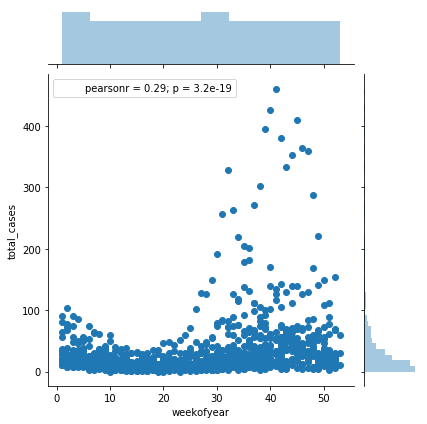

In [12]:
plt.figure(figsize=(10, 20))
sns.jointplot(data=X_and_y, x='weekofyear', y='total_cases')

## Correlations

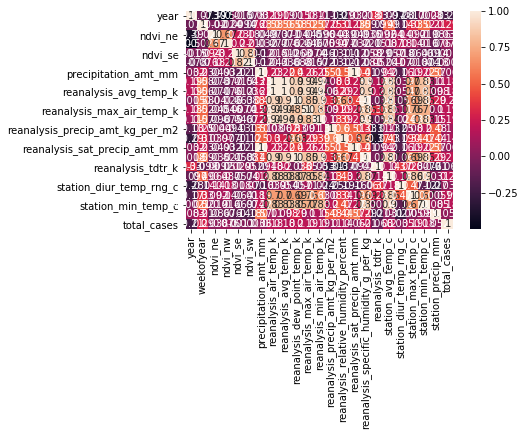

In [13]:
sns.heatmap(X_and_y.corr(), annot=True)

In [14]:
corr = X_and_y.corr()
corr = corr.reset_index()
corr.head()

,index,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,year,1.000000,-0.073143,-0.392312,-0.498367,-0.014863,-0.077928,0.031612,0.185813,0.189696,...,-0.286206,0.031612,0.018129,0.325336,-0.097312,-0.276963,-0.172907,-0.002097,0.082920,-0.212690
1,weekofyear,-0.073143,1.000000,-0.020271,-0.023549,-0.009380,-0.075804,0.231961,0.575381,0.561001,...,0.306771,0.231961,0.585224,-0.099084,0.485038,-0.137093,0.325748,0.520129,0.213336,0.287134
2,ndvi_ne,-0.392312,-0.020271,1.000000,0.673037,0.234049,0.177792,-0.048727,-0.073170,-0.071176,...,0.039138,-0.048727,-0.035235,-0.009248,0.064027,0.142875,0.092365,0.018818,-0.085993,0.037639
3,ndvi_nw,-0.498367,-0.023549,0.673037,1.000000,0.196343,0.214615,-0.032351,-0.077457,-0.076375,...,0.077339,-0.032351,-0.020595,-0.050657,0.087298,0.184124,0.136659,0.016428,-0.076237,0.075307
4,ndvi_se,-0.014863,-0.009380,0.234049,0.196343,1.000000,0.821354,-0.119386,-0.014601,-0.011905,...,-0.114294,-0.119386,-0.058442,0.029358,-0.056545,0.018121,-0.063718,-0.069275,-0.140286,0.001113


## Correlation with total_cases 

In [15]:
total_cases_corr = X_and_y.corr()['total_cases'].reset_index()
total_cases_corr.columns = ['feature', 'corr_with_total_cases']
total_cases_corr.head()

,feature,corr_with_total_cases
0,year,-0.212690
1,weekofyear,0.287134
2,ndvi_ne,0.037639
3,ndvi_nw,0.075307
4,ndvi_se,0.001113


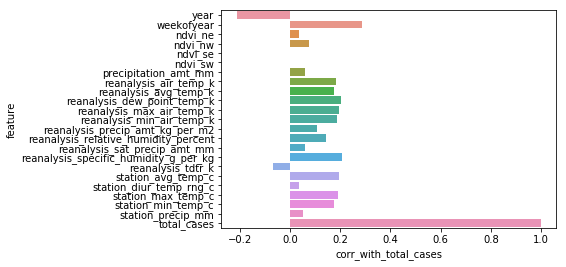

In [16]:
sns.barplot(data=total_cases_corr, y='feature', x='corr_with_total_cases')

## Transformation functions

In [17]:
ndvi_feature_names = list(filter(lambda s: s.startswith(r'ndvi'), list(X.columns)))
reanalysis_feature_names = list(filter(lambda s: s.startswith(r'reanalysis'), list(X.columns)))
station_feature_names = list(filter(lambda s: s.startswith('station'), list(X.columns)))

numerical_features = ndvi_feature_names + reanalysis_feature_names + station_feature_names

In [18]:
def remove_poorly_correlated_features(df):
    return df

def add_historical_values(df):
    historical_data = df[numerical_features].rolling(4).mean().fillna(method="bfill")
    column_rename = lambda name: 'past_' + name
    historical_data.columns = map(column_rename, historical_data.columns)
    return pd.concat([df, historical_data], axis=1)

def fill_missing_values(df):
    new_df = df.fillna(method='ffill')
    return new_df

def drop_unwanted_variables(df):
    columns_to_remove = ['city', 'week_start_date', 'year']
    columns_to_remove += ['ndvi_ne', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
    new_df = df.drop(columns=columns_to_remove)
    return new_df

def assign_a_cluster(df):
    kmeans = KMeans(2)
    df['cluster'] = kmeans.fit_predict(df)
    return df

def normalize(df):
    for column in df.columns:
        new_vals= (df[column] - df[column].min()) / (df[column].max() - df[column].min())
        df[column] = new_vals
    return df

def select_features(X, y):
    return SelectKBest(f_regression, k=10).fit_transform(X, y)

def apply_all_transformations(df):
    df = add_historical_values(df)
    df = fill_missing_values(df)
    df = drop_unwanted_variables(df)
    df = normalize(df)
#     df = select_features(df)
#     df = assign_a_cluster(df)
    return df

In [19]:
X = apply_all_transformations(X)

# Testing models 

In [20]:
def print_cross_val_scores(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    print('MAE scores: ' + str(scores))
    average = scores.sum() / len(scores)
    print('Average MAE score: ' + str(average))
    return average
    
#     scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
#     print('MSE scores: ' + str(scores))
#     average = scores.sum() / len(scores)
#     print('Average MSE score: ' + str(average))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
list(map(lambda x: x.shape, [X_test, X_train, y_test, y_train]))

[(234, 36), (702, 36), (234,), (702,)]

In [22]:
scores = {}

## Random Forest

In [23]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)

In [24]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.6690742864396957

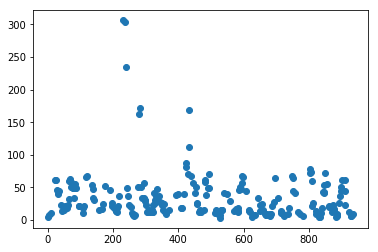

In [25]:
plt.scatter(X_test.index, forest.predict(X_test))

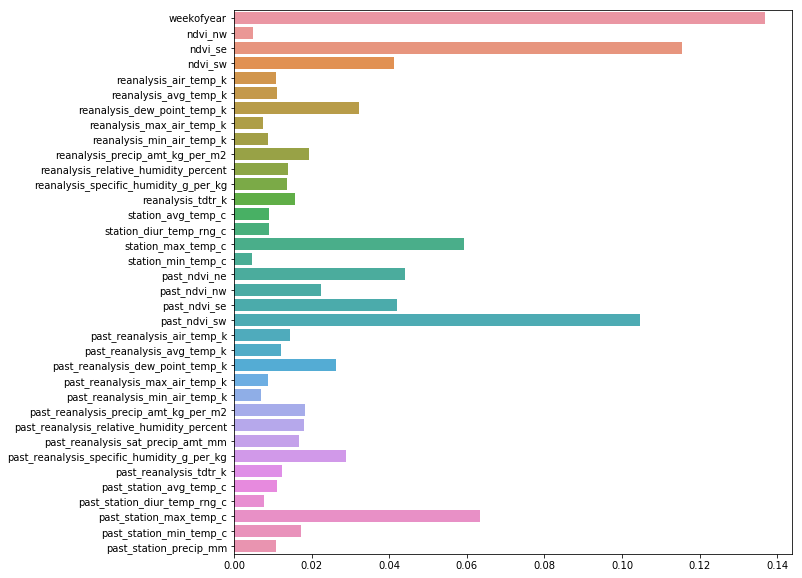

In [26]:
plt.figure(figsize=(10, 10))
sns.barplot(forest.feature_importances_, X.columns)

In [27]:
X.columns[forest.feature_importances_ < 0.05]

Index(['ndvi_nw', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_min_temp_c',
       'past_ndvi_ne', 'past_ndvi_nw', 'past_ndvi_se',
       'past_reanalysis_air_temp_k', 'past_reanalysis_avg_temp_k',
       'past_reanalysis_dew_point_temp_k', 'past_reanalysis_max_air_temp_k',
       'past_reanalysis_min_air_temp_k',
       'past_reanalysis_precip_amt_kg_per_m2',
       'past_reanalysis_relative_humidity_percent',
       'past_reanalysis_sat_precip_amt_mm',
       'past_reanalysis_specific_humidity_g_per_kg', 'past_reanalysis_tdtr_k',
       'past_station_avg_temp_c', 'past_station_diur_temp_rng_c',
       'past_station_min_temp_c', 'past_station_precip_mm'],


In [28]:
scores['forest'] = print_cross_val_scores(forest, X, y, cv=6)

MAE scores: [-21.7750641  -47.22782051 -30.29147436 -18.38211538 -18.48089744
 -24.94570513]
Average MAE score: -26.85051282051283


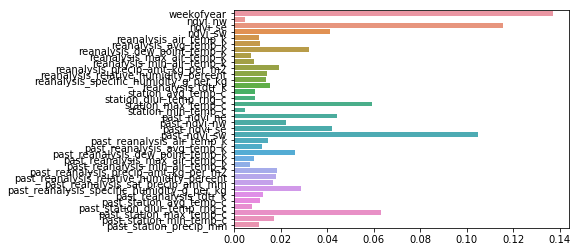

In [29]:
sns.barplot(y=X.columns, x=forest.feature_importances_)

In [30]:
forest2 = RandomForestRegressor(random_state=42, max_features=6)

In [31]:
scores['forest2'] = print_cross_val_scores(forest2, X, y, cv=6)

MAE scores: [-24.97435897 -47.44551282 -31.49807692 -16.58589744 -22.51987179
 -24.88525641]
Average MAE score: -27.984829059829057


In [32]:
forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## Decision Tree 

In [33]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [34]:
scores['tree'] = print_cross_val_scores(tree, X, y, cv=6)

MAE scores: [-26.32692308 -53.78846154 -31.42948718 -20.87820513 -19.18589744
 -33.71153846]
Average MAE score: -30.886752136752136


In [35]:
param_grid = {
    'criterion': ['mse', 'mae'],
    'max_depth': [1, 2, 3, 5, 10, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}
tree_grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 5, 10, None], 'max_features': ['auto', 'sqrt', 'log2'], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
tree_grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

## Lasso Model

In [37]:
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.09915858026654556

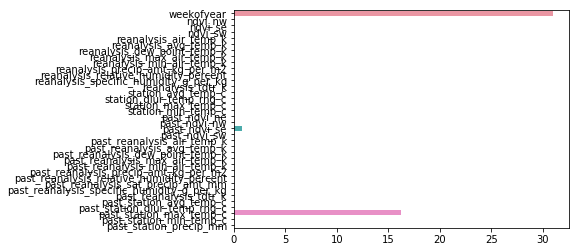

In [38]:
sns.barplot(lasso.coef_, X.columns)

In [39]:
lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_absolute_error')
lasso_scores

array([-23.21007697, -37.9353101 , -29.37939368, -23.62856456,
       -25.18214602])

In [40]:
scores['lasso'] = print_cross_val_scores(lasso, X, y)

MAE scores: [-23.21007697 -37.9353101  -29.37939368 -23.62856456 -25.18214602]
Average MAE score: -27.867098267284213


In [41]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[100, 10, 1], random_state=42)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[100, 10, 1], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=False)

In [42]:
scores['lasso_cv'] = print_cross_val_scores(lasso_cv, X, y)

MAE scores: [-23.21007697 -37.9353101  -29.94496048 -23.62856456 -28.21235444]
Average MAE score: -28.586253310971813


## SVM

In [43]:
svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
svr.score(X_train, y_train), svr.score(X_test, y_test)

(-0.050958646306489275, -0.04617042356529111)

In [45]:
scores['svr'] = print_cross_val_scores(svr, X, y, cv=10)

MAE scores: [-30.69132389 -14.24848401 -66.53589327  -8.64138684 -49.53831178
 -12.13296968 -16.03980958  -9.36278401 -18.97266152 -17.28974506]
Average MAE score: -24.34533696392533


## Gaussian Naive Bayes 

In [46]:
nb = GaussianNB()

In [47]:
scores['nb'] = print_cross_val_scores(nb, X, y)

/home/sivakar/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


MAE scores: [-45.08108108 -23.62254902 -20.06145251 -21.68987342 -26.45588235]
Average MAE score: -27.38216767706362


## Ada Boost

In [48]:
base_estimator = DecisionTreeRegressor(max_features='sqrt', max_depth=5)
ada = AdaBoostRegressor(random_state=42, n_estimators=500, learning_rate=0.00002, base_estimator=base_estimator)
scores['ada'] = print_cross_val_scores(ada, X, y)

MAE scores: [-20.16382768 -37.18569258 -29.86533678 -15.62299614 -19.63377235]
Average MAE score: -24.494325105479497


In [49]:
# ada2 = AdaBoostRegressor(random_state=42, n_estimators=500, learning_rate=0.00001, base_estimator=LinearRegression())
# scores['ada2'] = print_cross_val_scores(ada2, X, y)

## Gradient Boost

In [50]:
gboost = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.001)
scores['gboost'] = print_cross_val_scores(gboost, X, y)

MAE scores: [-20.68871095 -38.14991341 -29.60600483 -23.16618393 -27.4643906 ]
Average MAE score: -27.815040742876118


In [51]:
X_and_y['week_start_date'].shape, y.shape

((936,), (936,))

# Neural Network

In [52]:
nn = Sequential()
nn.add(Dense(10, input_dim=X.shape[1] ,activation='relu'))
nn.add(Dense(10, activation='relu'))
nn.add(Dense(10, activation='relu'))
nn.add(Dense(1, activation='relu'))

In [53]:
nn.compile(optimizer='adam', loss='mae')

In [54]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [55]:
nn.fit(X_train, y_train, epochs=200)

Epoch 1/200
702/702 [==============================] - 1s 2ms/step - loss: 33.7353
Epoch 2/200
702/702 [==============================] - 0s 114us/step - loss: 32.7806
Epoch 3/200
702/702 [==============================] - 0s 94us/step - loss: 31.3017
Epoch 4/200
702/702 [==============================] - 0s 106us/step - loss: 29.2290
Epoch 5/200
702/702 [==============================] - 0s 102us/step - loss: 26.7246
Epoch 6/200
702/702 [==============================] - 0s 90us/step - loss: 24.7326
Epoch 7/200
702/702 [==============================] - 0s 104us/step - loss: 24.0485
Epoch 8/200
702/702 [==============================] - 0s 102us/step - loss: 23.9502
Epoch 9/200
702/702 [==============================] - 0s 126us/step - loss: 23.9430
Epoch 10/200
702/702 [==============================] - 0s 146us/step - loss: 23.9408
Epoch 11/200
702/702 [==============================] - 0s 127us/step - loss: 23.9487
Epoch 12/200
702/702 [==============================] - 0s 157us/st

702/702 [==============================] - 0s 130us/step - loss: 22.6002
Epoch 97/200
702/702 [==============================] - 0s 123us/step - loss: 22.6104
Epoch 98/200
702/702 [==============================] - 0s 127us/step - loss: 22.6446
Epoch 99/200
702/702 [==============================] - 0s 107us/step - loss: 22.5924
Epoch 100/200
702/702 [==============================] - 0s 116us/step - loss: 22.6015
Epoch 101/200
702/702 [==============================] - 0s 119us/step - loss: 22.5968
Epoch 102/200
702/702 [==============================] - 0s 112us/step - loss: 22.5928
Epoch 103/200
702/702 [==============================] - 0s 103us/step - loss: 22.5924
Epoch 104/200
702/702 [==============================] - 0s 123us/step - loss: 22.5626
Epoch 105/200
702/702 [==============================] - 0s 117us/step - loss: 22.5496
Epoch 106/200
702/702 [==============================] - 0s 104us/step - loss: 22.5465
Epoch 107/200
702/702 [==============================] - 0s 

702/702 [==============================] - 0s 104us/step - loss: 22.0903
Epoch 191/200
702/702 [==============================] - 0s 97us/step - loss: 22.0875
Epoch 192/200
702/702 [==============================] - 0s 94us/step - loss: 22.0538
Epoch 193/200
702/702 [==============================] - 0s 100us/step - loss: 22.0874
Epoch 194/200
702/702 [==============================] - 0s 94us/step - loss: 22.0585
Epoch 195/200
702/702 [==============================] - 0s 111us/step - loss: 22.0487
Epoch 196/200
702/702 [==============================] - 0s 104us/step - loss: 22.0795
Epoch 197/200
702/702 [==============================] - 0s 109us/step - loss: 22.0845
Epoch 198/200
702/702 [==============================] - 0s 100us/step - loss: 22.1214
Epoch 199/200
702/702 [==============================] - 0s 99us/step - loss: 22.0821
Epoch 200/200
702/702 [==============================] - 0s 102us/step - loss: 22.0179


In [56]:
scores['nn'] = nn.evaluate(X_test, y_test)

234/234 [==============================] - 0s 280us/step


In [57]:
scores

{'forest': -26.85051282051283,
 'forest2': -27.984829059829057,
 'tree': -30.886752136752136,
 'lasso': -27.867098267284213,
 'lasso_cv': -28.586253310971813,
 'svr': -24.34533696392533,
 'nb': -27.38216767706362,
 'ada': -24.494325105479497,
 'gboost': -27.815040742876118,
 'nn': 22.277526456066685}

# Visualizing Predictions

In [58]:
# plt.figure(figsize=(20, 10))
# plt.scatter(X.index, y)
# ada.fit(X_train, y_train)
# plt.scatter(X_train.index, ada.predict(X_train))
# plt.scatter(X_test.index, ada.predict(X_test))

In [59]:
# plt.figure(figsize=(20, 10))
# plt.scatter(X_test.index, y_test)
# forest.fit(X_train, y_train)
# plt.scatter(X_test.index, forest.predict(X_test))

# Predicting on unknown data 

In [60]:
X_new = pd.read_csv('dengue_features_test.csv')
X_new = X_new[X_new['city'] == 'sj']

In [61]:
output = pd.DataFrame()

In [62]:
output = X_new[['city', 'year', 'weekofyear']]

In [63]:
X_new = apply_all_transformations(X_new)
X_new.head()

,weekofyear,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,...,past_reanalysis_precip_amt_kg_per_m2,past_reanalysis_relative_humidity_percent,past_reanalysis_sat_precip_amt_mm,past_reanalysis_specific_humidity_g_per_kg,past_reanalysis_tdtr_k,past_station_avg_temp_c,past_station_diur_temp_rng_c,past_station_max_temp_c,past_station_min_temp_c,past_station_precip_mm
0,0.326923,0.224094,0.254570,0.318123,0.379229,0.369925,0.531640,0.491525,0.440678,0.084174,...,0.075775,0.409946,0.243459,0.472976,0.907895,0.446233,0.672956,0.642553,0.41,0.231461
1,0.346154,0.231645,0.200016,0.261375,0.375699,0.371429,0.512800,0.440678,0.491525,0.072429,...,0.075775,0.409946,0.243459,0.472976,0.907895,0.446233,0.672956,0.642553,0.41,0.231461
2,0.365385,0.231645,0.382093,0.319111,0.577523,0.539850,0.643662,0.677966,0.440678,0.013670,...,0.075775,0.409946,0.243459,0.472976,0.907895,0.446233,0.672956,0.642553,0.41,0.231461
3,0.384615,0.222971,0.311534,0.421746,0.625772,0.618045,0.513823,0.813559,0.525424,0.007299,...,0.075775,0.409946,0.243459,0.472976,0.907895,0.446233,0.672956,0.642553,0.41,0.231461
4,0.403846,0.292325,0.147862,0.272193,0.644307,0.606015,0.565022,0.694915,0.593220,0.014466,...,0.042895,0.327409,0.043598,0.482547,0.962406,0.501829,0.676101,0.642553,0.49,0.250987


In [64]:
model = ada

In [65]:
model.fit(X, y)
predictions = model.predict(X_new)

predictions = predictions.round()
predictions[:10]

array([16., 15., 16., 15., 13., 14., 15., 16., 16., 18.])

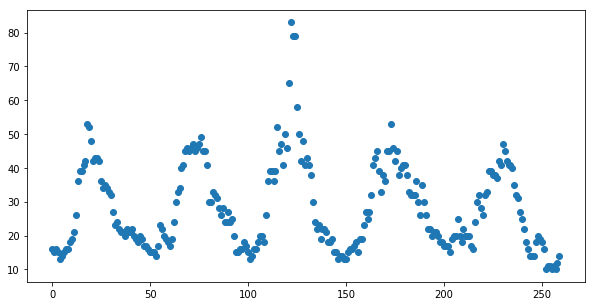

In [69]:
plt.figure(figsize=(10, 5))
plt.scatter(X_new.index, predictions)

In [67]:
output['total_cases'] = predictions
output['total_cases'] = pd.to_numeric(output['total_cases'], downcast='integer')
output.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,16
1,sj,2008,19,15
2,sj,2008,20,16
3,sj,2008,21,15
4,sj,2008,22,13


In [68]:
output.to_csv('submission_san_juan.csv', index=False)